In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

import os

In [8]:
class exp_work():

  def access(self, path, verbose = True):
    self.data = pd.read_csv(path)#"/content/data-clustering-rackathon.csv"
    if verbose==True:
      print(self.data.describe())
  
  def check_missing_vals(self, deal_with = None):
    print(self.data.isnull().sum().sort_values(ascending=False))
    if deal_with is not None:
      print("\nDEALING WITH MISSING VALUES...\n")
      if deal_with =="All":
        for x in ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
                  'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
                  'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
                  'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
                  'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']:
          self.data.loc[(self.data[x].isnull()==True),x]=self.data[x].mean()
      else:
        for x in deal_with:
          self.data.loc[(self.data[x].isnull()==True),x]=self.data[x].mean()
      print("DONE\n")
    print(self.data.isnull().sum().sort_values(ascending=False))

  def preprocess(self, normalize=True, save=None):
    columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']
    for c in columns:
        Range=c+'_RANGE'
        self.data[Range]=0        
        self.data.loc[((self.data[c]>0)&(self.data[c]<=500)),Range]=1
        self.data.loc[((self.data[c]>500)&(self.data[c]<=1000)),Range]=2
        self.data.loc[((self.data[c]>1000)&(self.data[c]<=3000)),Range]=3
        self.data.loc[((self.data[c]>3000)&(self.data[c]<=5000)),Range]=4
        self.data.loc[((self.data[c]>5000)&(self.data[c]<=10000)),Range]=5
        self.data.loc[((self.data[c]>10000)),Range]=6
    columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']
    for c in columns:  
        Range=c+'_RANGE'
        self.data[Range]=0
        self.data.loc[((self.data[c]>0)&(self.data[c]<=0.1)),Range]=1
        self.data.loc[((self.data[c]>0.1)&(self.data[c]<=0.2)),Range]=2
        self.data.loc[((self.data[c]>0.2)&(self.data[c]<=0.3)),Range]=3
        self.data.loc[((self.data[c]>0.3)&(self.data[c]<=0.4)),Range]=4
        self.data.loc[((self.data[c]>0.4)&(self.data[c]<=0.5)),Range]=5
        self.data.loc[((self.data[c]>0.5)&(self.data[c]<=0.6)),Range]=6
        self.data.loc[((self.data[c]>0.6)&(self.data[c]<=0.7)),Range]=7
        self.data.loc[((self.data[c]>0.7)&(self.data[c]<=0.8)),Range]=8
        self.data.loc[((self.data[c]>0.8)&(self.data[c]<=0.9)),Range]=9
        self.data.loc[((self.data[c]>0.9)&(self.data[c]<=1.0)),Range]=10
    columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  
    for c in columns:  
        Range=c+'_RANGE'
        self.data[Range]=0
        self.data.loc[((self.data[c]>0)&(self.data[c]<=5)),Range]=1
        self.data.loc[((self.data[c]>5)&(self.data[c]<=10)),Range]=2
        self.data.loc[((self.data[c]>10)&(self.data[c]<=15)),Range]=3
        self.data.loc[((self.data[c]>15)&(self.data[c]<=20)),Range]=4
        self.data.loc[((self.data[c]>20)&(self.data[c]<=30)),Range]=5
        self.data.loc[((self.data[c]>30)&(self.data[c]<=50)),Range]=6
        self.data.loc[((self.data[c]>50)&(self.data[c]<=100)),Range]=7
        self.data.loc[((self.data[c]>100)),Range]=8
    self.data.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)
    if save is not None:
      self.data.to_csv(save+'processed_data.csv', index=False)
    self.data.drop(['CUST_ID'], axis=1, inplace=True)
    self.X= np.asarray(self.data)
    if normalize==True:
      scale = StandardScaler()
      self.X = scale.fit_transform(self.X)
    
  def elbow_curve(self, n=30):
    n_clusters= n
    cost=[]
    for i in range(1,n_clusters):
        kmean= KMeans(i)
        kmean.fit(self.X)
        cost.append(kmean.inertia_)  
    plt.plot(cost, 'bx-')
    plt.show()

  def do_clustering(self, num_of_clusters=6, verbose=True, save=None):
    kmean= KMeans(num_of_clusters)
    kmean.fit(self.X)
    self.labels=kmean.labels_
    self.clusters=pd.concat([self.data, pd.DataFrame({'cluster':self.labels})], axis=1)
    if verbose==True:
      print(self.clusters.head())
    if save is not None:
      self.clusters.to_csv(save+'clustered_data.csv', index=False)

  def show_graphs(self):
    for c in self.clusters:
      grid= sns.FacetGrid(self.clusters, col='cluster')
      grid.map(plt.hist, c)

  def tagging(self, names=["People with average to high credit limit who make all type of purchases", 
                           "This group has more people with due payments who take advance cash more often",
                           "Less money spenders with average to high credit limits who purchases mostly in installments",
                           "People with high credit limit who take more cash in advance",
                           "High spenders with high credit limit who make expensive purchases",
                           "People who dont spend much money and who have average to high credit limit"], colors=['red', 'blue', 'green', 'yellow', 'orange','purple']):
    self.names={}
    self.colors={}
    for x in range(len(names)):
      self.names[x] = names[x]
      self.colors[x] = colors[x] 

  def visual(self):
    dist = 1 - cosine_similarity(self.X)
    pca = PCA(2)
    pca.fit(dist)
    X_PCA = pca.transform(dist)

    x, y = X_PCA[:, 0], X_PCA[:, 1]      
    df = pd.DataFrame({'x': x, 'y':y, 'label':self.labels}) 
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(20, 13)) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
                color=self.colors[name],label=self.names[name], mec='none')
        ax.set_aspect('auto')
        ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
        ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    ax.legend()
    ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
    plt.show()


# How to Use:

creating object of the class

In [9]:
obj = exp_work()

accessing the data as csv

In [10]:
obj.access("/content/data-clustering-rackathon.csv")

            BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE
count   8950.000000        8950.000000  ...       8950.000000  8950.000000
mean    1564.474828           0.877271  ...          0.153715    11.517318
std     2081.531879           0.236904  ...          0.292499     1.338331
min        0.000000           0.000000  ...          0.000000     6.000000
25%      128.281915           0.888889  ...          0.000000    12.000000
50%      873.385231           1.000000  ...          0.000000    12.000000
75%     2054.140036           1.000000  ...          0.142857    12.000000
max    19043.138560           1.000000  ...          1.000000    12.000000

[8 rows x 17 columns]


If there are missing values we deal with them

In [11]:
obj.check_missing_vals(deal_with='All')

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64

DEALING WITH MISSING VALUES...

DONE

TENURE                              0
PRC_FULL_PAYMENT                    0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0


preprocessing the data

In [12]:
obj.preprocess(save='/content/')

elbow curve to check for the value of num_of_clusters

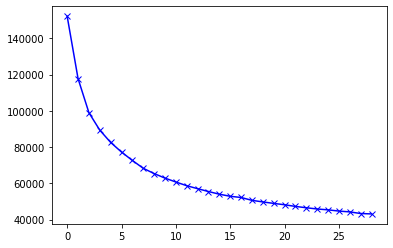

In [13]:
obj.elbow_curve()

performing clustering

In [14]:
obj.do_clustering(save='/content/')

   TENURE  BALANCE_RANGE  ...  CASH_ADVANCE_TRX_RANGE  cluster
0      12              1  ...                       0        0
1      12              4  ...                       1        3
2      12              3  ...                       0        1
3      12              3  ...                       1        0
4      12              2  ...                       0        0

[5 rows x 18 columns]


plotting graphs to aid in deciding tags


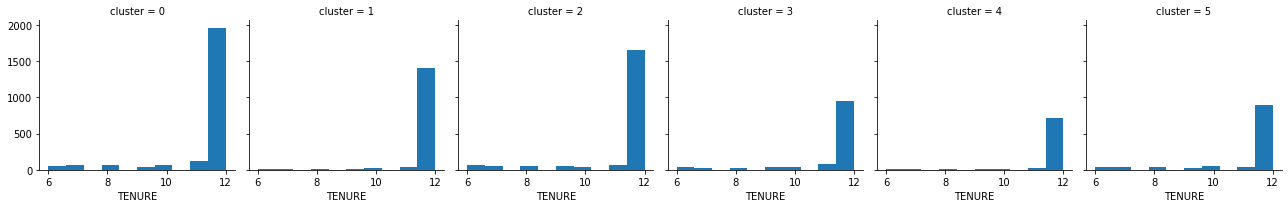

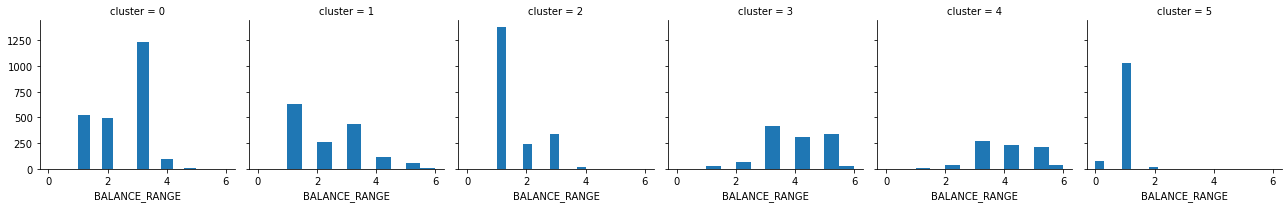

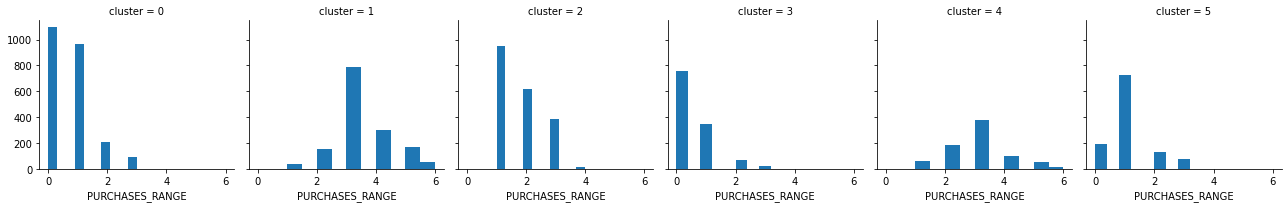

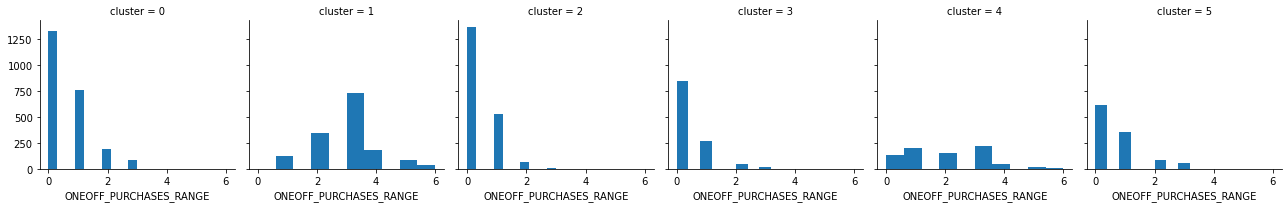

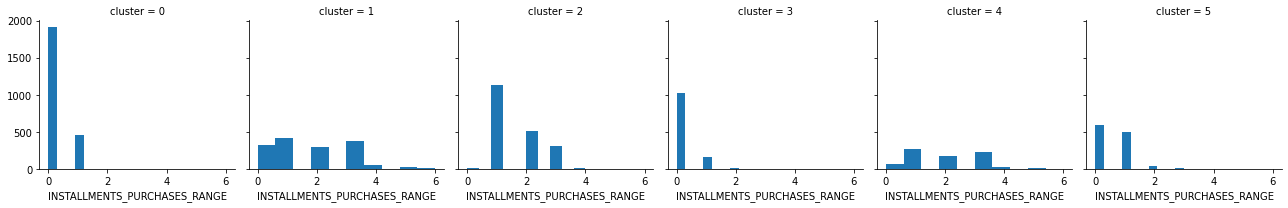

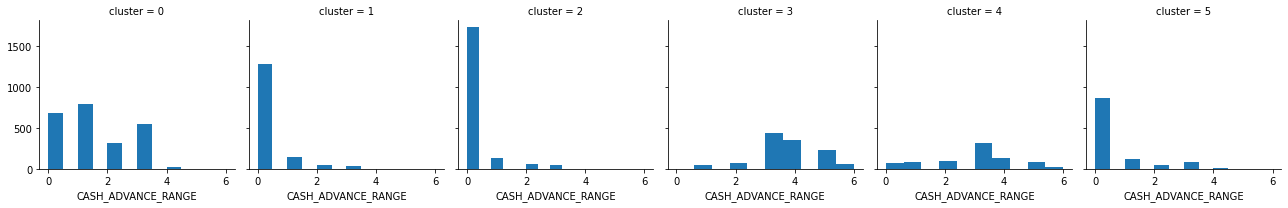

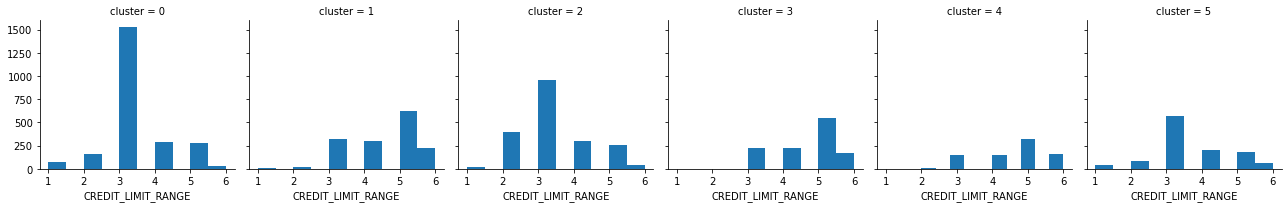

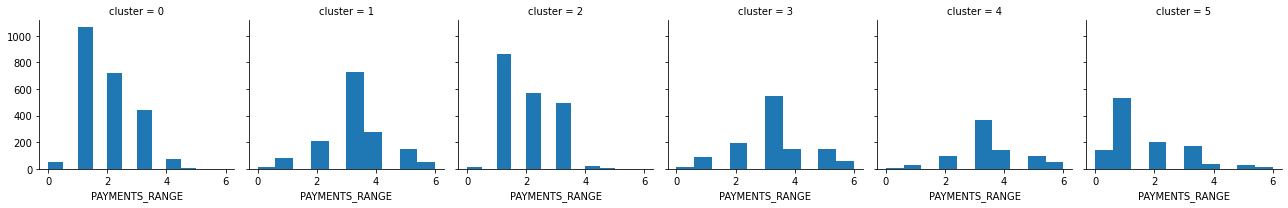

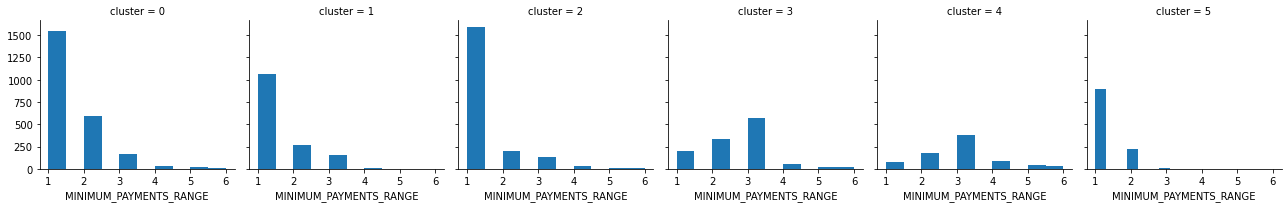

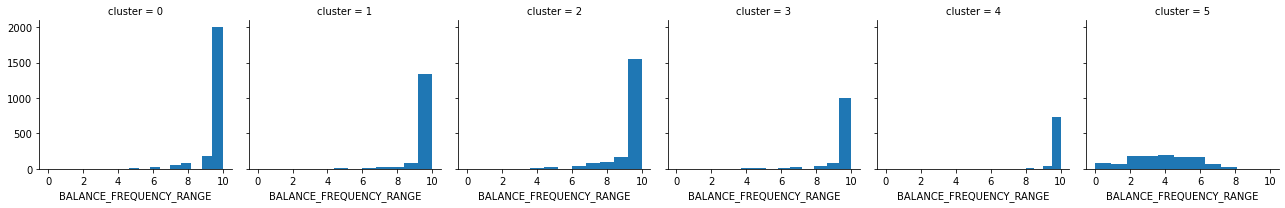

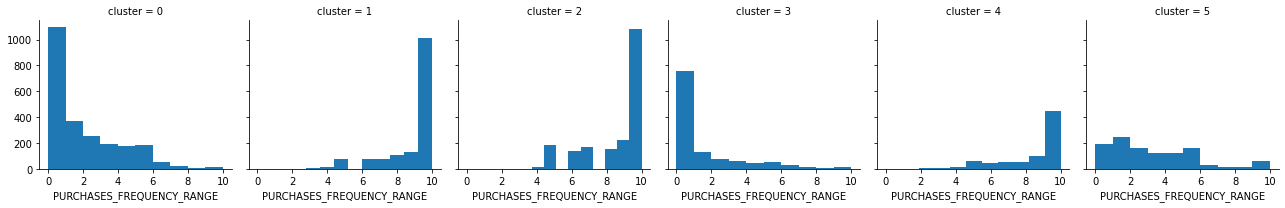

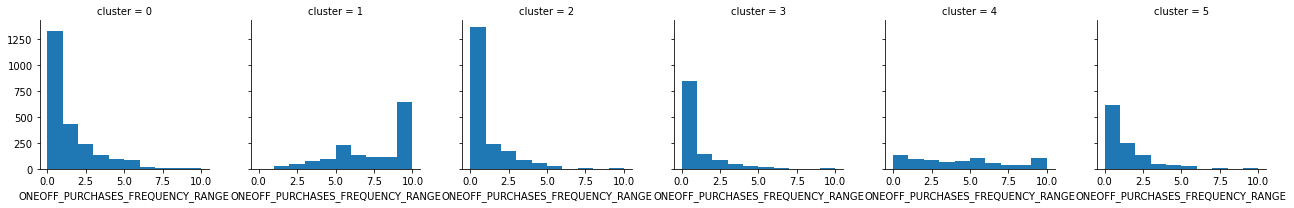

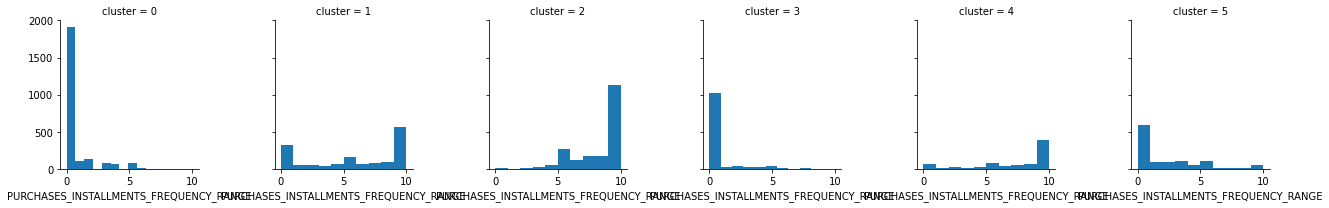

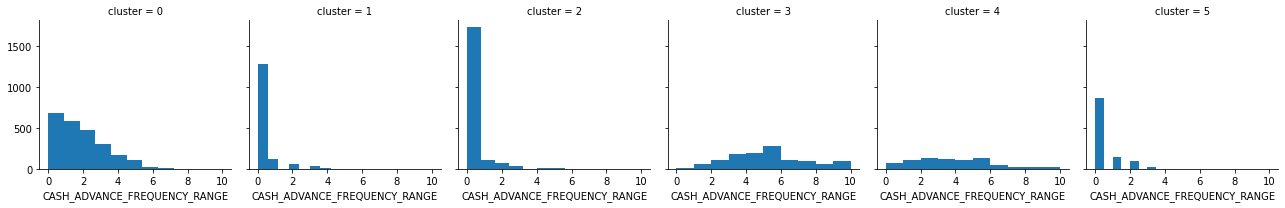

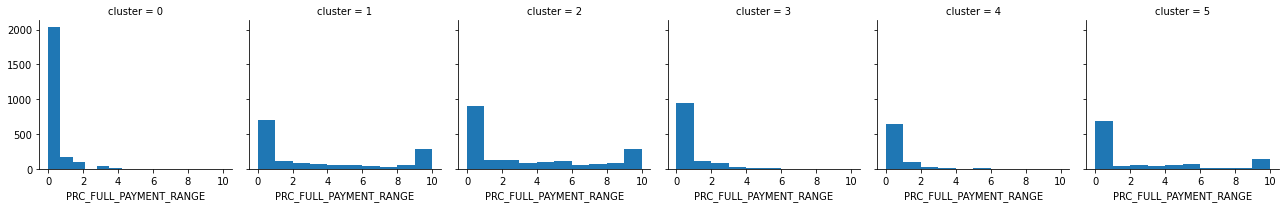

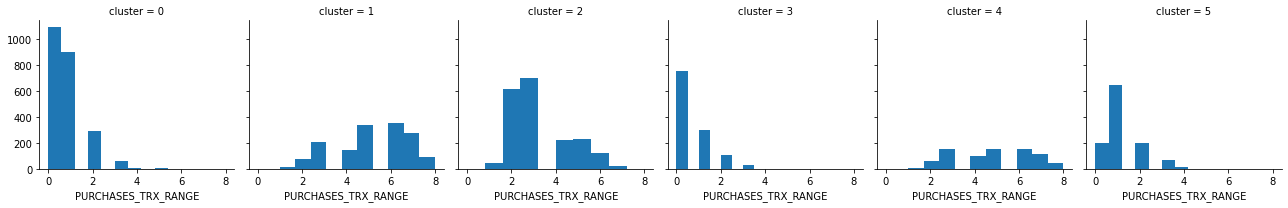

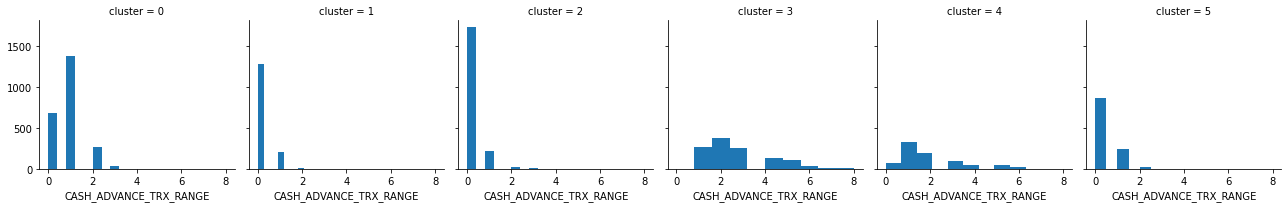

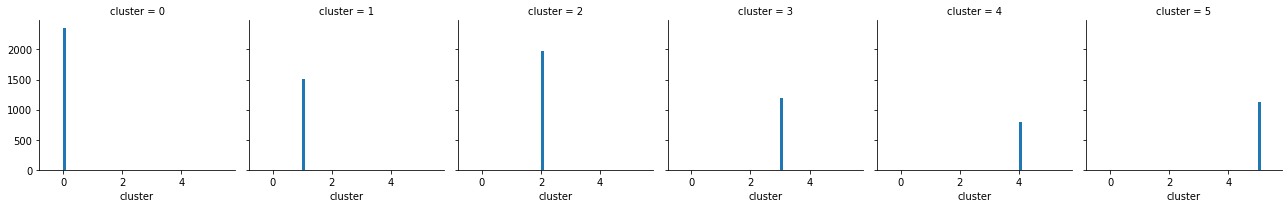

In [15]:
obj.show_graphs()

tagging the clusters

In [16]:
obj.tagging()

creating 2d visualisation of clusters

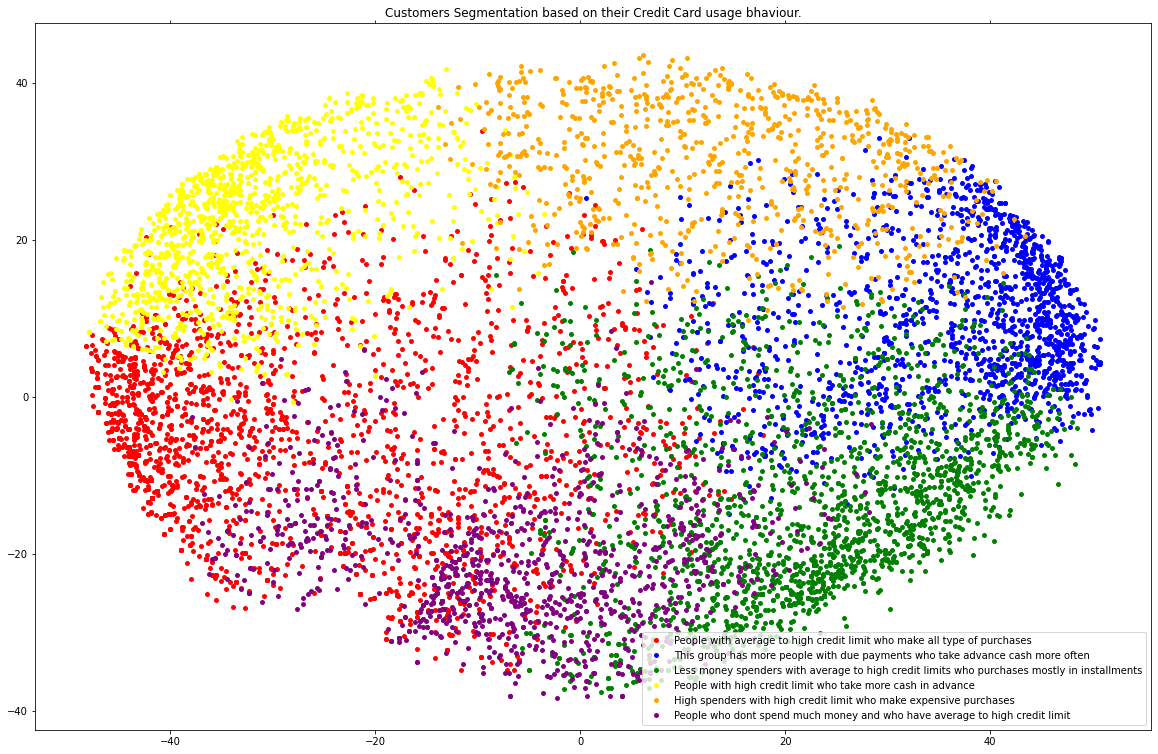

In [17]:
obj.visual()